# Use-case 2: Encoding multiple options and overlapping areas. Example: Tree species in Europe

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#
# We need to adjust the path since we are in the sub-folder "example"
# and import the python module from a relative path, not the installed
# version.
#
import sys
sys.path.append("..")

In [27]:
#
# Import numpy and pythemap geo functions
#
import numpy
from pythemap import geo

#
# Generate a new raster layer
#
r = geo.Raster()

#
# Generate a new legend. In pythemap, the data is not necessarily
# human-readable and the legend is required to be able to traverse
# to the datums and extract the values.
#
legend = geo.Legend()

root =  {
        "metadata":{
            "type":"options"
        },
        "items": {
            "Betula pendula": ["Silver birch"],
            "Fagus sylvatica": ["European beech"],
            "Pinus pinaster": ["Maritime pine", "Pine"],
            "Quercus robur": ["English oak", "Oak"]
            }
        }

#
# Add the json to the layer class. It will be remembered and used in future
# to encode/decode/mask the data
#
legend.put(root)

#
# The non-encoded CORINE land use / land cover was pre-processed
# and can be imported here as numpy array.
#
a = numpy.load("../../data/TreeSpecies/tree_species_nd.npy")

In [28]:
encoded = r.encode(a, legend, False)

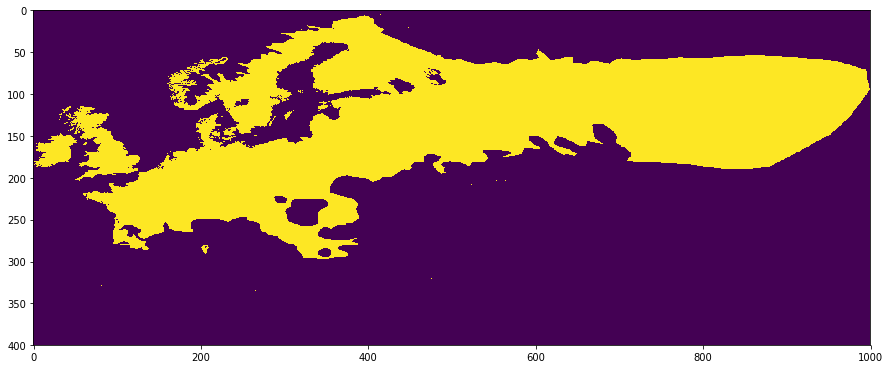

In [4]:
mask = r.mask("Betula pendula", encoded, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

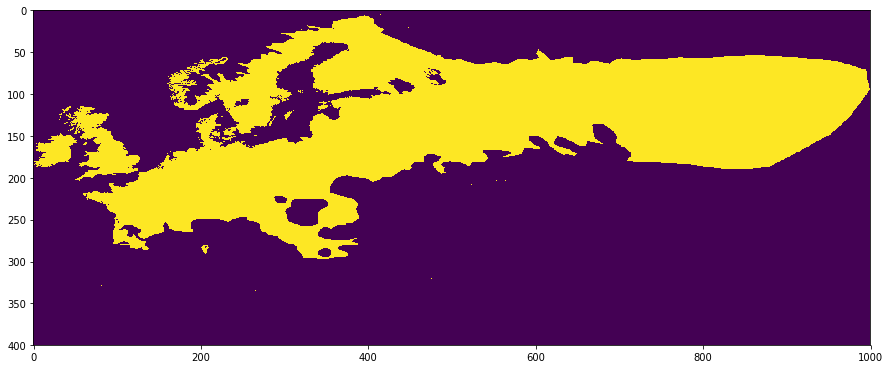

In [18]:
#
# Note that this is just the same data, but accessed under a different name.
# Therefore, the output should be the same
#
mask = r.mask("Silver birch", encoded, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

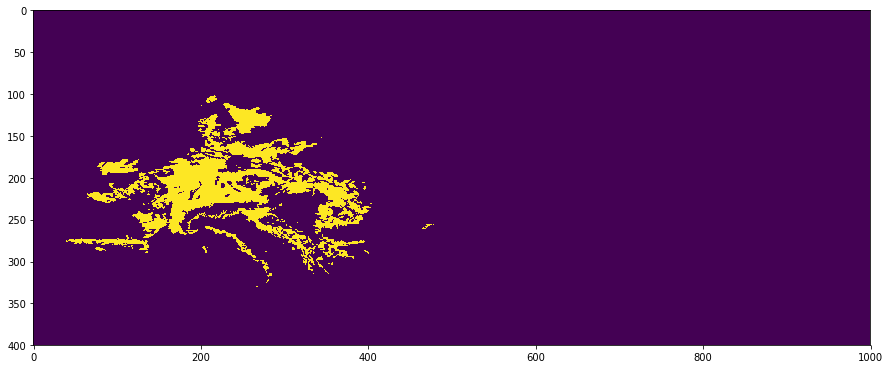

In [20]:
mask = r.mask("Fagus sylvatica", encoded, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

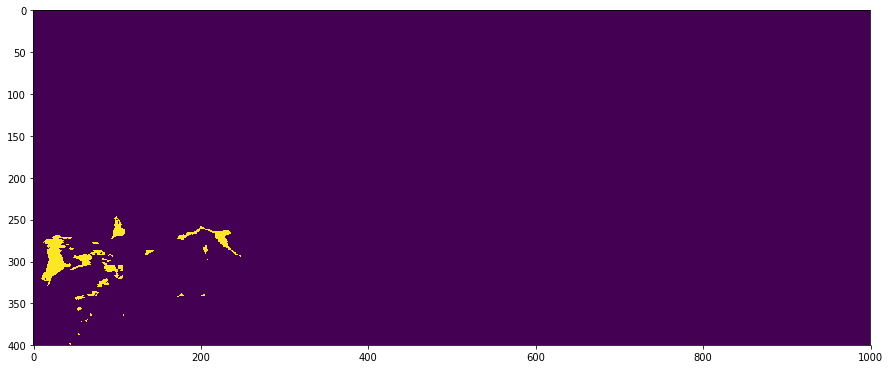

In [23]:
mask = r.mask("Maritime pine", encoded, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

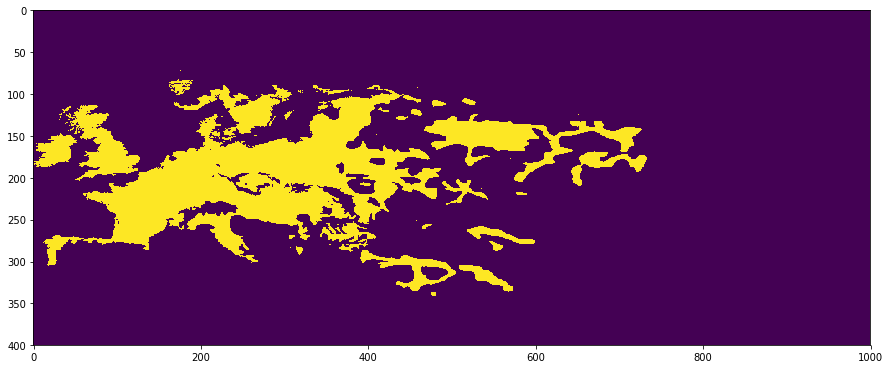

In [25]:
mask = r.mask("Oak", encoded, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

It is also possible to query all of them. Per default, it works like an "OR" operator, i.e., the map shows the number of occurrences. There are only three colours, because there is no area where all four tree species occur.

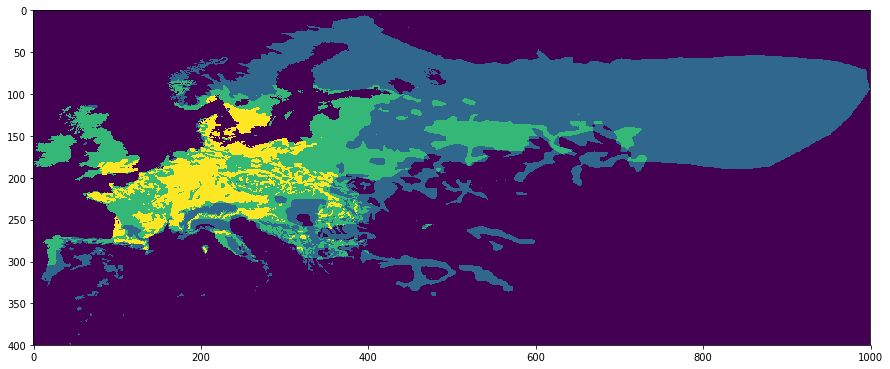

In [9]:
mask = r.mask(["Betula pendula","Fagus sylvatica","Pinus pinaster", "Quercus robur"], encoded, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

This is an example, which works like an "AND" operator, i.e, it shows all regions where both trees are occurring.

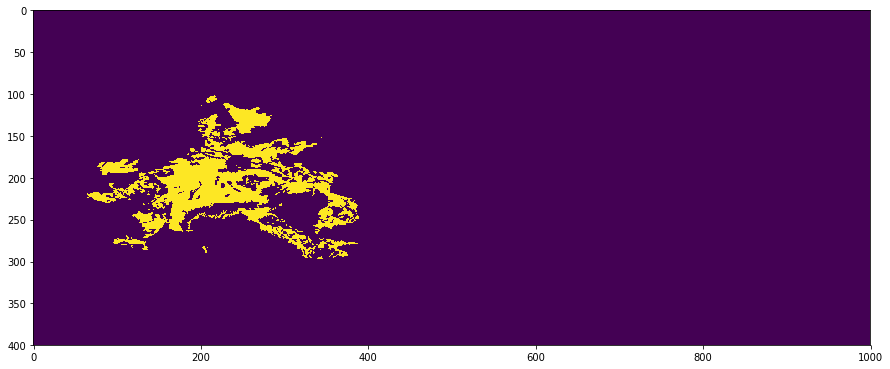

In [10]:
mask = r.mask(["Betula pendula","Fagus sylvatica"], encoded, legend, logic = 'AND')
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

We can add a new layer dynamically, here a silver fir

In [30]:
toadd = numpy.load("../../data/TreeSpecies/tree_species_toadd.npy")

#
# Do not forget to add the legend entry
#
combined = r.add(layer = toadd, data = encoded, legend = legend.addItem(item = {"Abies alba": ["Silver fir"]}))

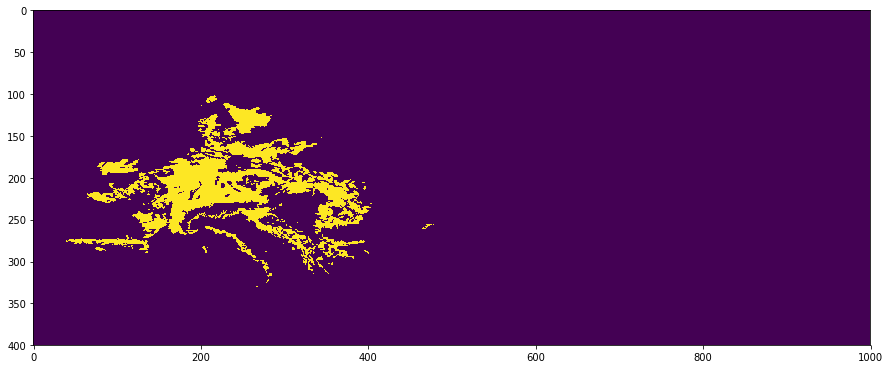

In [12]:
mask = r.mask("Fagus sylvatica", combined, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

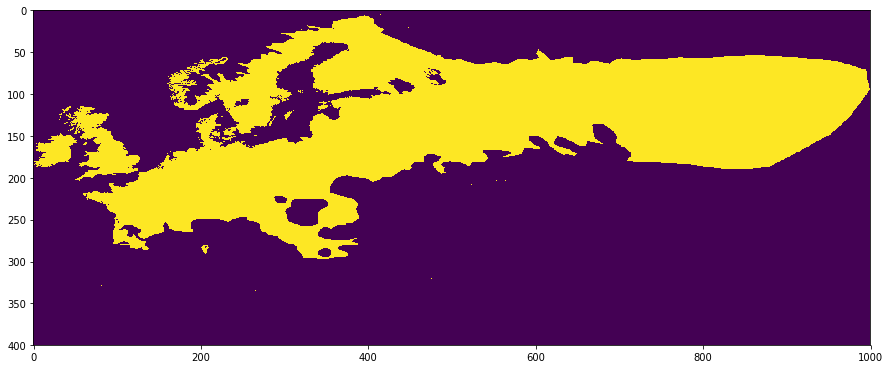

In [13]:
mask = r.mask("Betula pendula", combined, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

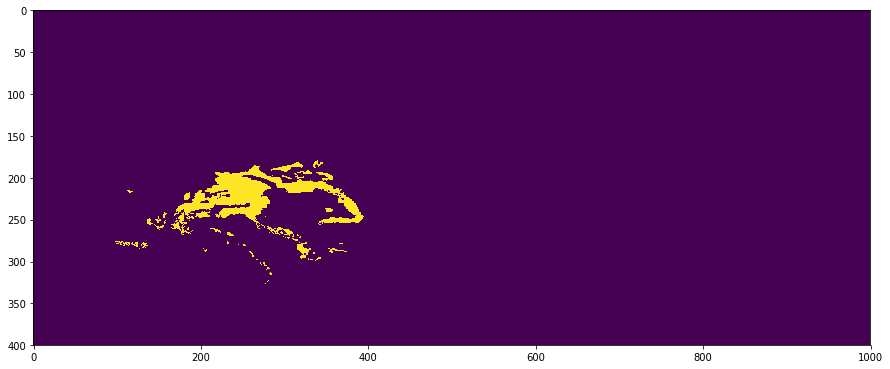

In [32]:
mask = r.mask("Abies alba", combined, legend)
plt.figure(figsize=(15,10))
plt.imshow(mask)
plt.show()

At this point the maximum value in the encoded dataset is ...

In [15]:
numpy.max(encoded)

385

... which allows to store the data in 12-bit or 16-bit depth.